In [1]:
# !pip install tensorflow==2.1.0

In [18]:
import tensorflow as tf 
print(tf.__version__)

2.1.0


In [19]:
# !pip install -q tensorflow-datasets 

In [20]:
import tensorflow_datasets as tfds 

gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.2)
config=tf.compat.v1.ConfigProto(gpu_options=gpu_options)
session = tf.compat.v1.Session(config=config)

imdb,info=tfds.load('imdb_reviews/subwords8k',with_info=True,as_supervised=True) 

In [21]:
train_data1,test_data1=imdb['train'],imdb['test'] 

In [22]:
tokenizer=info.features['text'].encoder 
 

In [23]:
sample_string='TensorFlow, from basic to mastery'
tokenized_string =tokenizer.encode(sample_string) 
print('Tokenized string is {}'.format(tokenized_string))

Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 2715, 7, 2652, 8050]


In [24]:
original_string=tokenizer.decode(tokenized_string) 
print('The original string : {}'.format(original_string))

The original string : TensorFlow, from basic to mastery


In [25]:
for ts in tokenized_string:
    print('{} ----->{}'.format(ts,tokenizer.decode([ts])))

6307 ----->Ten
2327 ----->sor
4043 ----->Fl
2120 ----->ow
2 ----->, 
48 ----->from 
2715 ----->basic 
7 ----->to 
2652 ----->master
8050 ----->y


In [30]:
embedding_dim = 64

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [31]:
tokenizer.vocab_size*embedding_dim

523840

In [32]:
num_epochs = 50

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# train_data = train_data1.map(lambda x_text, x_label: (x_text, tf.expand_dims(x_label, -1)))
# test_data = test_data1.map(lambda x_text, x_label: (x_text, tf.expand_dims(x_label, -1)))
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_data1 = train_data1.shuffle(BUFFER_SIZE)
train_data = train_data1.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_data1))
test_data= test_data1.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data1))

history = model.fit(train_data, epochs=num_epochs, validation_data=test_data)

Epoch 1/10
  18366/Unknown - 168s 9ms/step - loss: 0.6857 - accuracy: 0.529

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25000/25000 [==============================] - 289s 12ms/step - loss: 0.6854 - accuracy: 0.5291 - val_loss: 0.6858 - val_accuracy: 0.5334
Epoch 2/10
25000/25000 [==============================] - 253s 10ms/step - loss: 0.6831 - accuracy: 0.5372 - val_loss: 0.6855 - val_accuracy: 0.5371
Epoch 3/10
25000/25000 [==============================] - 252s 10ms/step - loss: 0.6824 - accuracy: 0.5417 - val_loss: 0.6857 - val_accuracy: 0.5376
Epoch 4/10
25000/25000 [==============================] - 254s 10ms/step - loss: 0.6818 - accuracy: 0.5435 - val_loss: 0.6863 - val_accuracy: 0.5366
Epoch 5/10
25000/25000 [==============================] - 251s 10ms/step - loss: 0.6813 - accuracy: 0.5444 - val_loss: 0.6867 - val_accuracy: 0.5360
Epoch 6/10
25000/25000 [==============================] - 252s 10ms/step - loss: 0.6810 - accuracy: 0.5450 - val_loss: 0.6872 - val_accuracy: 0.5343
Epoch 7/10
25000/25000 [==============================] - 251s 10ms/step - loss: 0.6807 - accuracy: 0.5458 - val_loss

In [13]:
import matplotlib.pyplot as plt 
def plot_graphs(history,string):
    plt.plot(history.history[string]) 
    plt.plot(history.history['val_'+string]) 
    plt.xlabel('Epochs') 
    plt.ylabel(string) 
    plt.legend([string,'val_'+string]) 
    plt.show() 

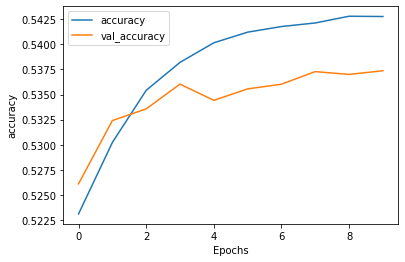

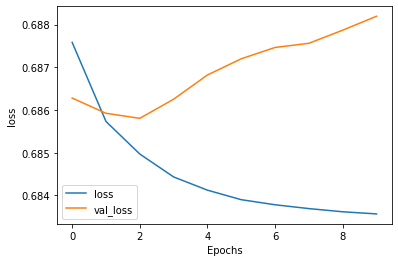

In [14]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [16]:
train_data

<MapDataset shapes: ((None,), (1,)), types: (tf.int64, tf.int64)>

In [17]:
for a in train_data:
    print(a) 
    break 

(<tf.Tensor: shape=(163,), dtype=int64, numpy=
array([  62,   18,   41,  604,  927,   65,    3,  644, 7968,   21,   35,
       5096,   36,   11,   43, 2948, 5240,  102,   50,  681, 7862, 1244,
          3, 3266,   29,  122,  640,    2,   26,   14,  279,  438,   35,
         79,  349,  384,   11, 1991,    3,  492,   79,  122,  188,  117,
         33, 4047, 4531,   14,   65, 7968,    8, 1819, 3947,    3,   62,
         27,    9,   41,  577, 5044, 2629, 2552, 7193, 7961, 3642,    3,
         19,  107, 3903,  225,   85,  198,   72,    1, 1512,  738, 2347,
        102, 6245,    8,   85,  308,   79, 6936, 7961,   23, 4981, 8044,
          3, 6429, 7961, 1141, 1335, 1848, 4848,   55, 3601, 4217, 8050,
          2,    5,   59, 3831, 1484, 8040, 7974,  174, 5773,   22, 5240,
        102,   18,  247,   26,    4, 3903, 1612, 3902,  291,   11,    4,
         27,   13,   18, 4092, 4008, 7961,    6,  119,  213, 2774,    3,
         12,  258, 2306,   13,   91,   29,  171,   52,  229,    2, 1245,
    